# Problem Statement:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.


# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading data into pandas Dataframe

In [6]:
credit_fraud_data = pd.read_csv("C:/Users/Taranjeet Kaur/Downloads/creditcard (1).csv")
credit_fraud_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
credit_fraud_data.shape

(284807, 31)

In [9]:
credit_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_fraud_data.isnull().sum()/len(credit_fraud_data)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [15]:
print('Number of Columns:', len(credit_fraud_data.columns))

Number of Columns: 31


In [16]:
credit_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [17]:
credit_fraud_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [18]:
credit_fraud_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [19]:
# Check for duplicate records
duplicate_rows = credit_fraud_data.duplicated().sum()
print('Number of duplicate records:', duplicate_rows)

Number of duplicate records: 1081


In [21]:
# Distribution of legit transactions and fraudulent transactions
# in this, 0 represents legit transactions and 1 represents fraudulent transactions
print(credit_fraud_data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


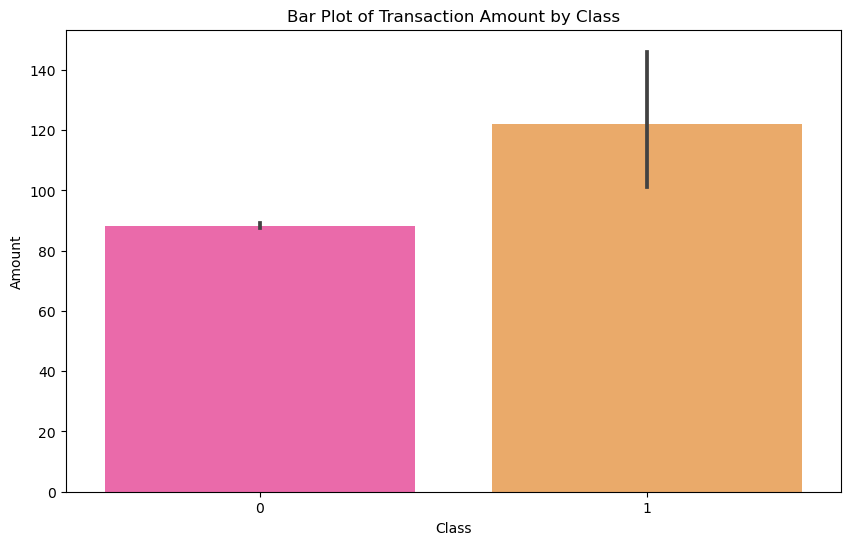

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Amount', data=credit_fraud_data, palette = "spring")
plt.title('Bar Plot of Transaction Amount by Class')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


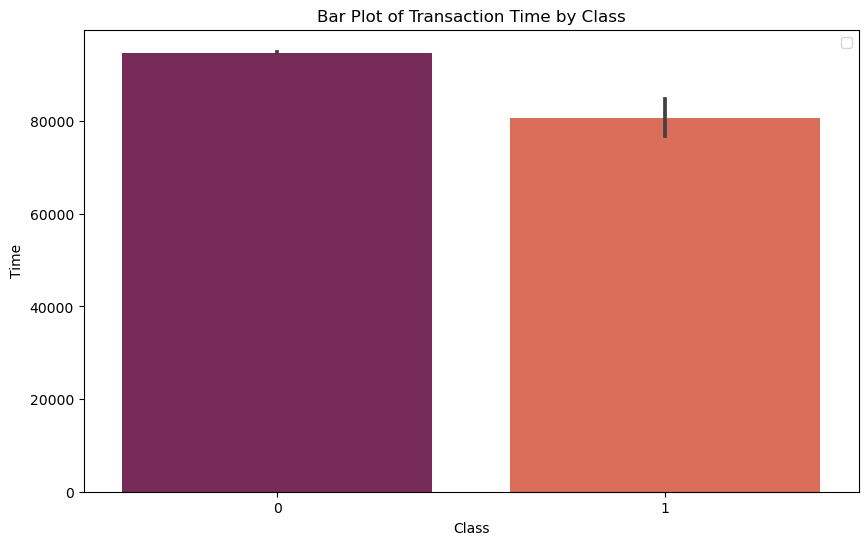

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data=credit_fraud_data, x='Class', y = 'Time', palette = "rocket")
plt.title('Bar Plot of Transaction Time by Class')
plt.show()

Text(0.5, 1.0, 'Distribution of Frauds(0 means No Fraud || 1 means Fraud)')

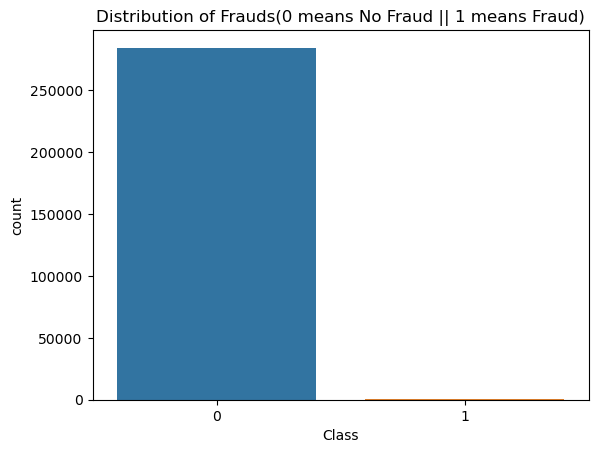

In [39]:
#Checking for class distribution

sns.countplot(x="Class", data = credit_fraud_data)
plt.title('Distribution of Frauds(0 means No Fraud || 1 means Fraud)')

In [41]:
(credit_fraud_data["Class"].value_counts()/284807)*100

Class
0    99.827251
1     0.172749
Name: count, dtype: float64

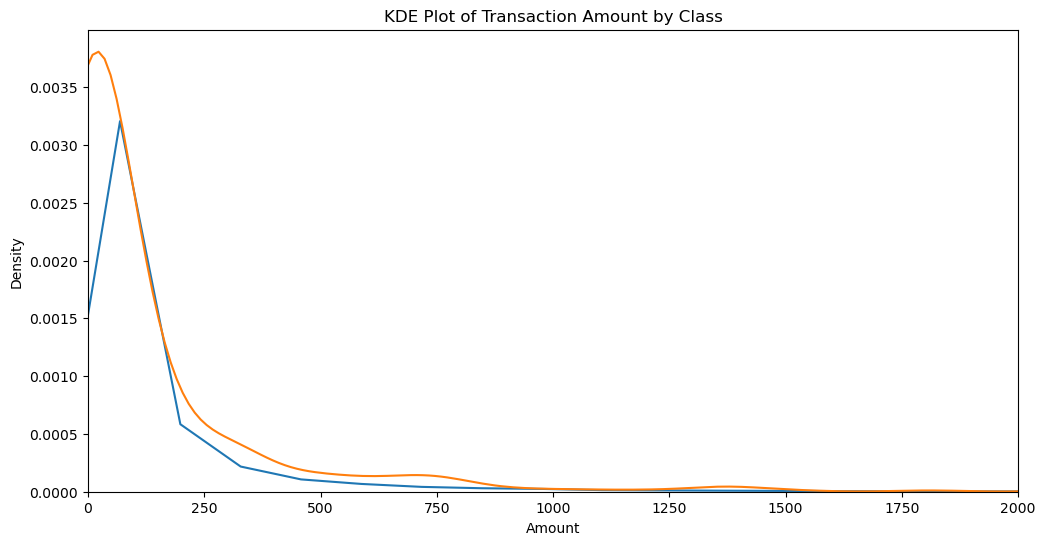

In [42]:
# Visualize KDE plot of transaction amount by class
plt.figure(figsize=(12, 6))
sns.kdeplot(credit_fraud_data[credit_fraud_data['Class'] == 0]['Amount'], label='Class 0')
sns.kdeplot(credit_fraud_data[credit_fraud_data['Class'] == 1]['Amount'], label='Class 1')
plt.title('KDE Plot of Transaction Amount by Class')
plt.xlim(0, 2000)  # Limiting x-axis for better readability
plt.show()

Text(0.5, 1.0, 'Distribution of Transaction Time')

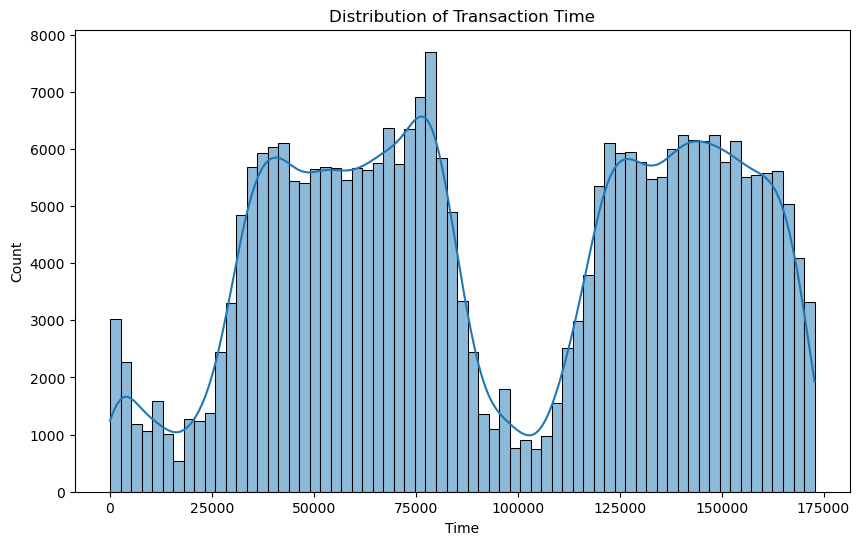

In [56]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data = credit_fraud_data, x = credit_fraud_data["Time"], kde=True)
ax.set_title("Distribution of Transaction Time")

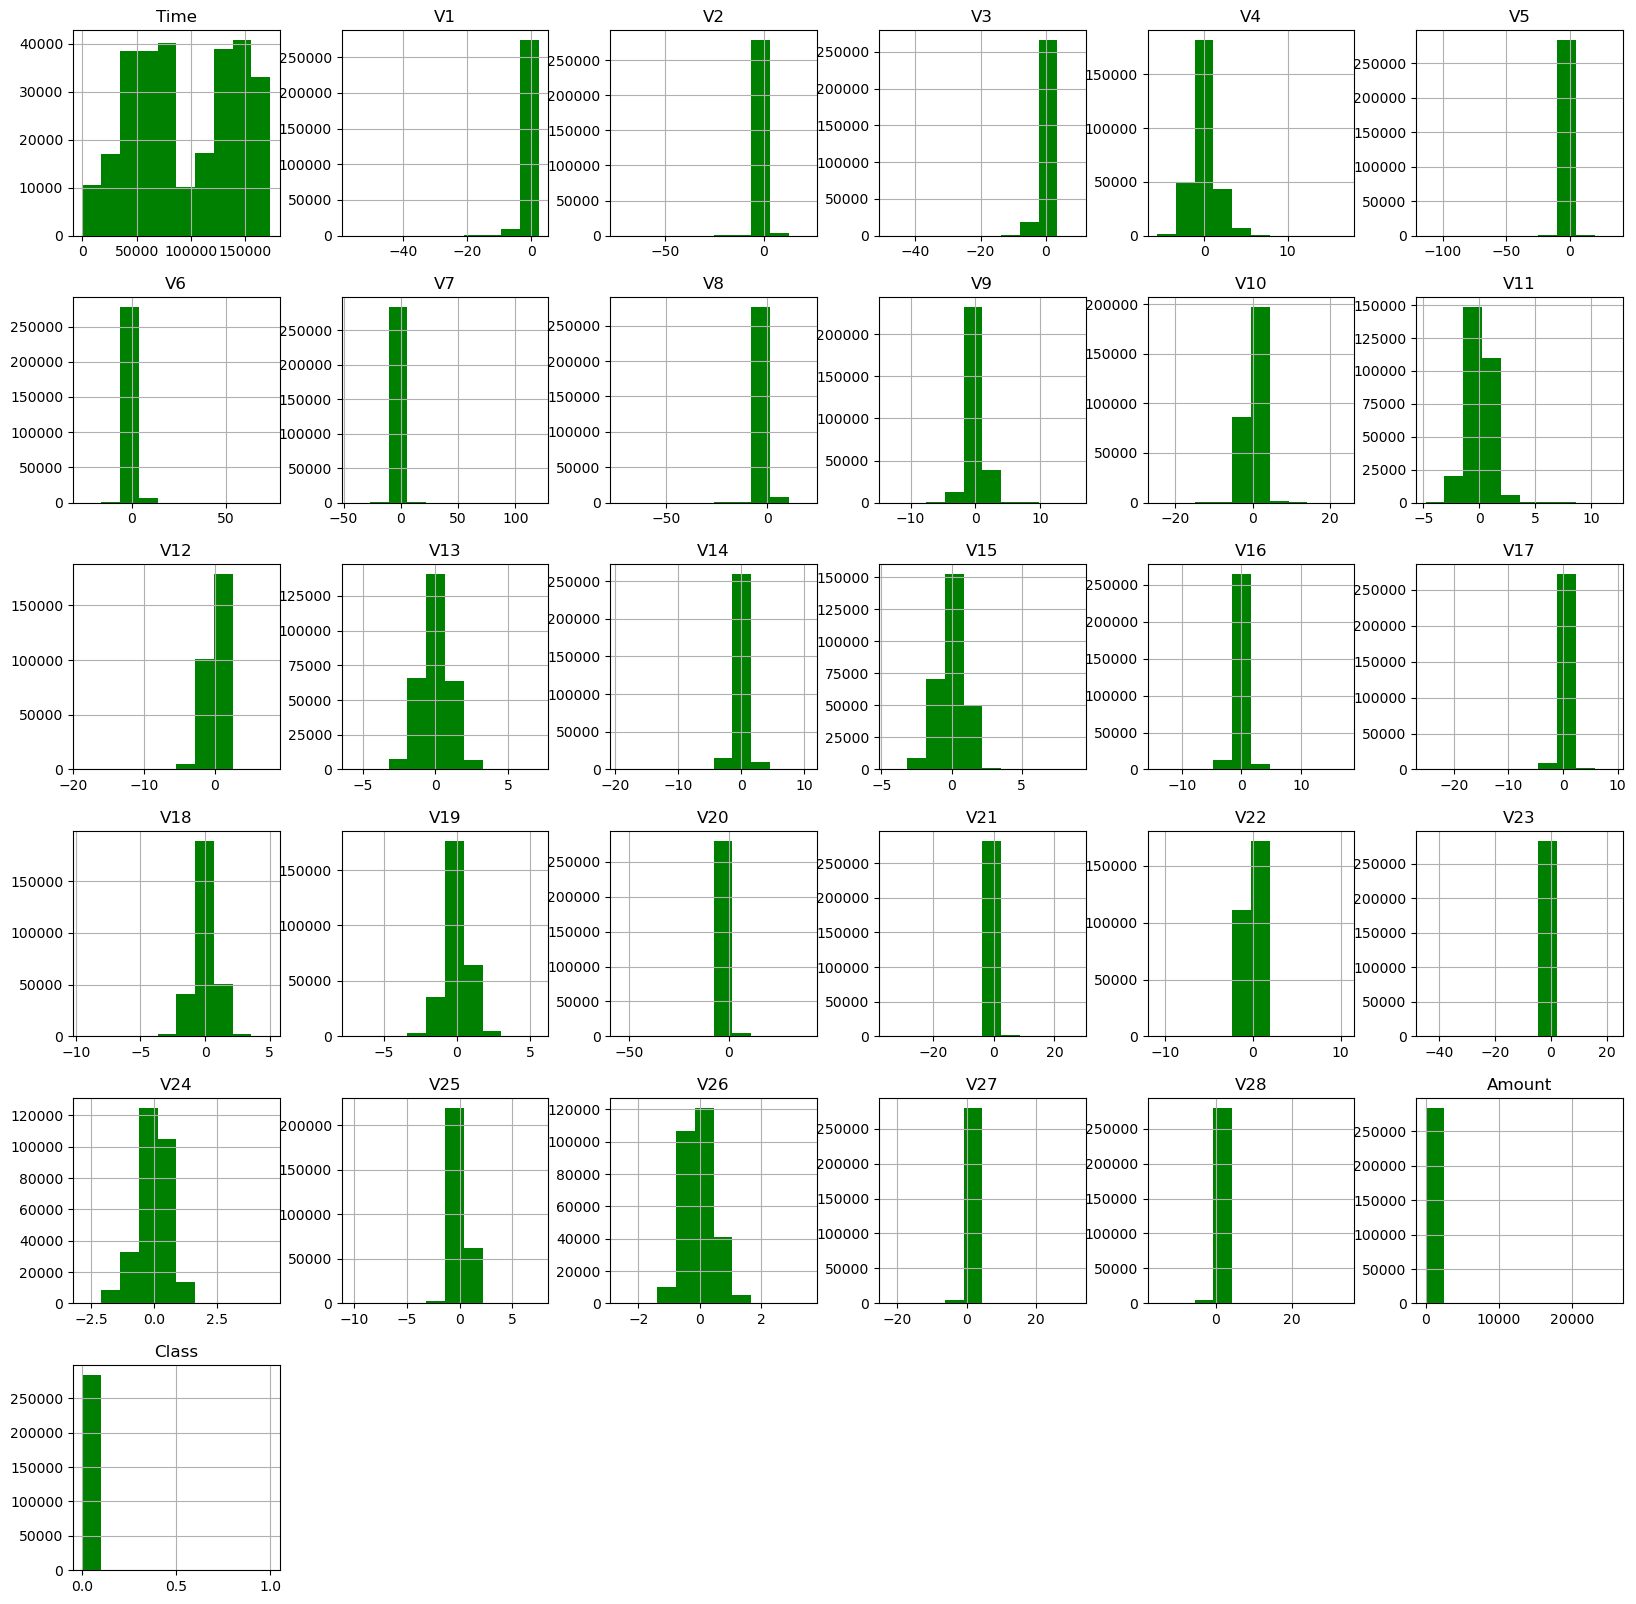

In [61]:
credit_fraud_data.hist(figsize=(20,20),color = 'green')
plt.show()

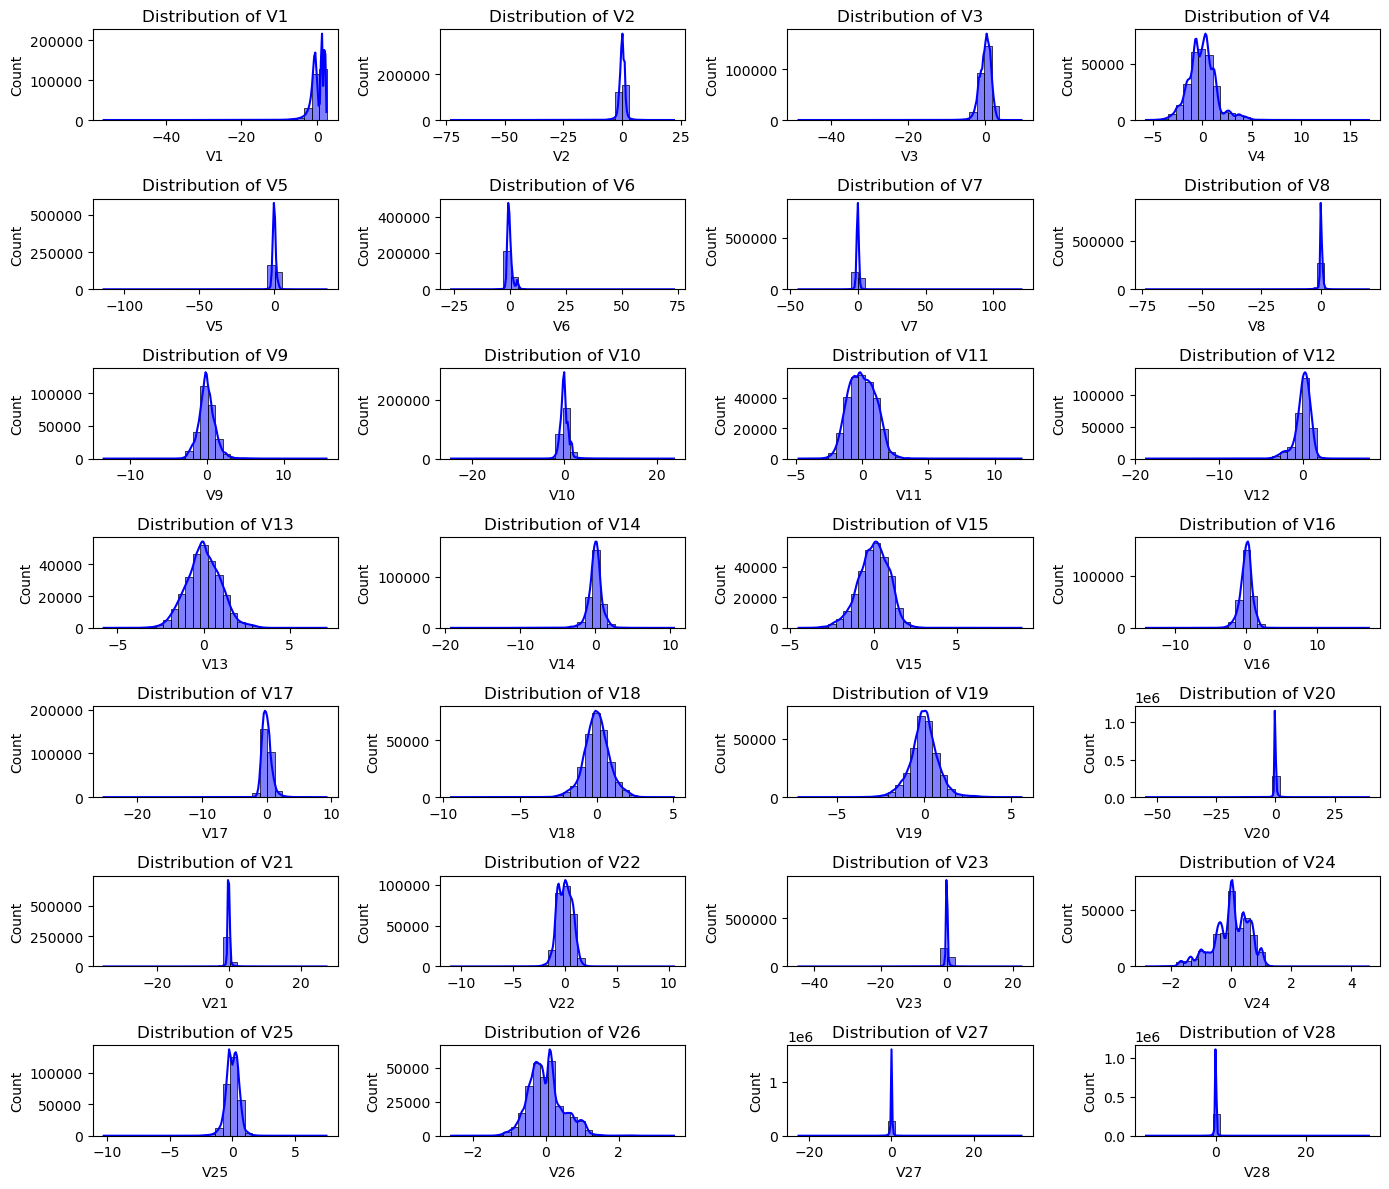

In [66]:
# Explore feature distributions
plt.figure(figsize=(14, 12))
for i in range(1, 29):  # Assuming V1 to V28 are the feature columns
    plt.subplot(7, 4, i)
    sns.histplot(credit_fraud_data[f'V{i}'], bins=30, kde=True,color = 'blue')
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

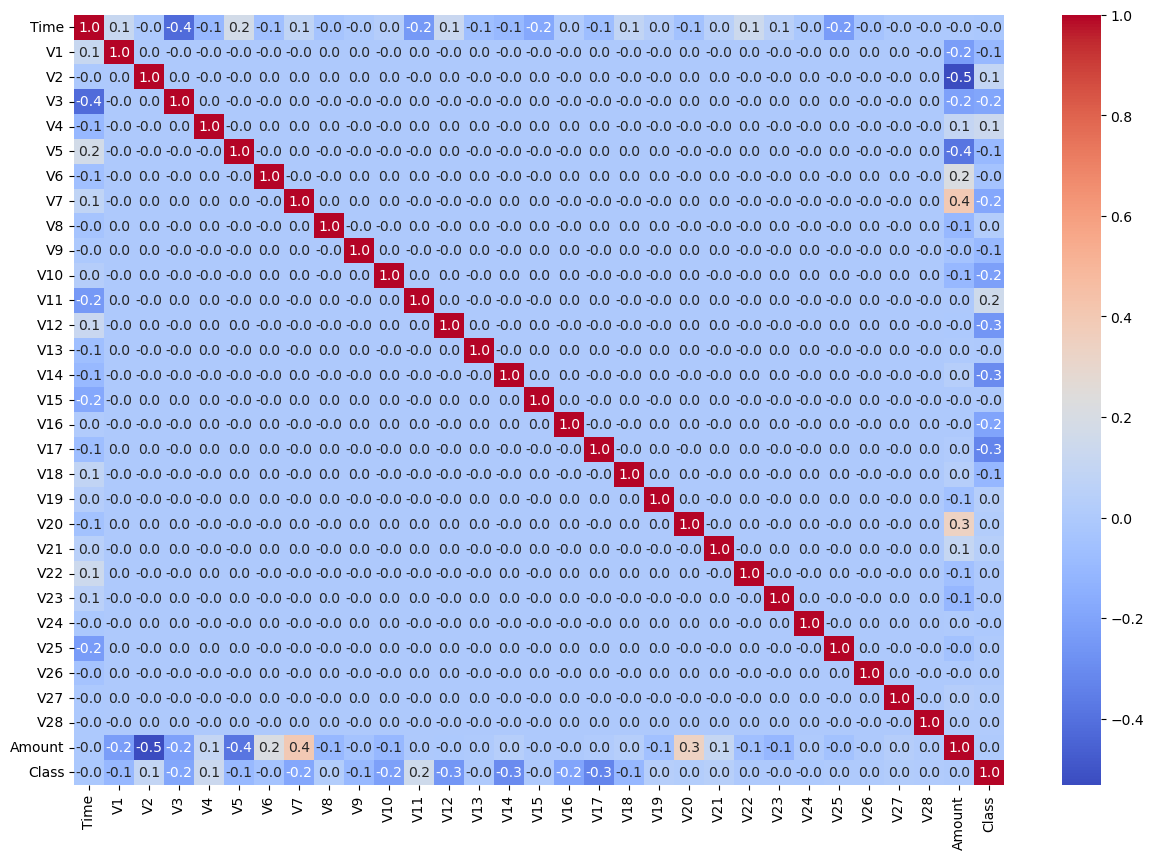

In [70]:
# Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(credit_fraud_data.corr(), annot= True, fmt='.1f', cmap='coolwarm')
plt.show()

# Data Cleaning and Preprocessing

In [72]:
# Handling outliers using Isolation Forest for 'Amount' and 'Time'
outlier_detector = IsolationForest(contamination=0.01, random_state=1)
credit_fraud_data['Outlier'] = outlier_detector.fit_predict(credit_fraud_data[['Amount', 'Time']])
credit_fraud_data = credit_fraud_data[credit_fraud_data['Outlier'] == 1].drop(columns='Outlier')

In [73]:
# Scaling 'Amount' using StandardScaler
scaler = StandardScaler()
credit_fraud_data['Amount'] = scaler.fit_transform(credit_fraud_data[['Amount']])


In [74]:
# Under-sampling
Legit = credit_fraud_data[credit_fraud_data['Class'] == 0]
fraud = credit_fraud_data[credit_fraud_data['Class'] == 1]
Legit_sample = Legit.sample(n=492)
new_dataset = pd.concat([Legit_sample, fraud], axis=0)

# Feature Engineering

In [75]:
# Split the data into features and targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

## Model Selection and Model Training

In [77]:
# Split the data into Training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [78]:
# Model Selection

# Model training: Logistic Regression
logistic_model = LogisticRegression(random_state=2, max_iter=10000, solver='lbfgs')  # Increase max_iter and specify solver

In [79]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=2, max_iter=10000, solver='lbfgs'), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, random_state=2),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [80]:
# Get the best hyperparameter
best_C = grid_search.best_params_['C']

In [81]:
# Model Training with the best hyperparameter
logistic_model = LogisticRegression(C=best_C, random_state=2, max_iter=10000, solver='lbfgs')  # Increase max_iter and specify solver
logistic_model.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=10000, random_state=2)

In [82]:
# Cross-Validation
cross_val_scores = cross_val_score(logistic_model, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross-Validation Scores:', cross_val_scores)

Cross-Validation Scores: [0.90909091 0.96103896 0.94805195 0.96103896 0.88235294]


In [83]:
# Model Evaluation

# Accuracy score on training data for Logistic Regression
X_train_prediction_logistic = logistic_model.predict(X_train)
training_data_accuracy_logistic = accuracy_score(X_train_prediction_logistic, Y_train)
print('Training data accuracy:', training_data_accuracy_logistic)

Training data accuracy: 0.9544863459037711


In [84]:
# Accuracy score on test data for Logistic Regression
X_test_prediction_logistic = logistic_model.predict(X_test)
test_data_accuracy_logistic = accuracy_score(X_test_prediction_logistic, Y_test)
print('Test data accuracy:', test_data_accuracy_logistic)

Test data accuracy: 0.9533678756476683


In [85]:
# Additional Model Evaluation Metrics for Logistic Regression
logistic_train_auc = roc_auc_score(Y_train, logistic_model.predict_proba(X_train)[:, 1])
logistic_test_auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])

print('Train Model AUC:', logistic_train_auc)
print('Test Model AUC:', logistic_test_auc)

Train Model AUC: 0.9891586811758973
Test Model AUC: 0.9732430689877498


In [86]:
# Model Comparison (Random Forest as an alternative)
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [87]:
# Additional Model Evaluation Metrics for Random Forest
rf_train_auc = roc_auc_score(Y_train, rf_model.predict_proba(X_train)[:, 1])
rf_test_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1])
print('Random Forest Train AUC:', rf_train_auc)
print('Random Forest Test AUC:', rf_test_auc)

Random Forest Train AUC: 1.0
Random Forest Test AUC: 0.9861917042768106


In [88]:
#Using F1 Score we are checking the accuracy on the testing dataset of logistic regression.
print('\nClassification Report (Logistic Regression):\n', classification_report(Y_test, X_test_prediction_logistic))
print('\nConfusion Matrix (Logistic Regression):\n', confusion_matrix(Y_test, X_test_prediction_logistic))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        99
           1       0.98      0.93      0.95        94

    accuracy                           0.95       193
   macro avg       0.96      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193


Confusion Matrix (Logistic Regression):
 [[97  2]
 [ 7 87]]


In [89]:
#Using F1 Score we are checking the accuracy on the testing dataset of random forest,

print('\nClassification Report (Random Forest):\n', classification_report(Y_test, rf_model.predict(X_test)))
print('\nConfusion Matrix (Random Forest):\n', confusion_matrix(Y_test, rf_model.predict(X_test)))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        99
           1       0.99      0.89      0.94        94

    accuracy                           0.94       193
   macro avg       0.95      0.94      0.94       193
weighted avg       0.95      0.94      0.94       193


Confusion Matrix (Random Forest):
 [[98  1]
 [10 84]]


In [90]:
# Model Interpretability

# Logistic Regression coefficients
feature_names = X.columns
coefficients = logistic_model.coef_[0]
feature_importance_logistic = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_logistic = feature_importance_logistic.sort_values(by='Coefficient', ascending=False)
print('\nLogistic Regression Coefficients:\n', feature_importance_logistic)


Logistic Regression Coefficients:
    Feature  Coefficient
4       V4     0.582711
22     V22     0.488000
5       V5     0.348443
7       V7     0.337746
29  Amount     0.329190
21     V21     0.270665
27     V27     0.081194
1       V1     0.079594
28     V28     0.057788
18     V18     0.029773
11     V11     0.025289
0     Time    -0.000030
23     V23    -0.001295
2       V2    -0.069595
24     V24    -0.075896
26     V26    -0.084608
19     V19    -0.086445
20     V20    -0.156733
13     V13    -0.184629
25     V25    -0.235185
15     V15    -0.243290
6       V6    -0.304986
16     V16    -0.306090
17     V17    -0.315824
9       V9    -0.343742
10     V10    -0.395924
3       V3    -0.403233
8       V8    -0.589873
12     V12    -0.611293
14     V14    -1.215774
